# Modern Neural Networks

## Introduction

This project aims to explore more on Convolutional Neural Networks (CNN) and its concepts or building blocks, that was expanded from Fully-connected networks, for the purpose of tackling computer vision tasks or problems. This notebook will demonstrate building a CNN with the TensorFlow API (as well as the Keras API). It will also explore the modern methods on training the model to imrpove its robustness in practice.

## Breakdown of this Notebook:
- CNNs concepts.
- CNNs' relevance for Computer Vision Tasks.
- Implementation of CNNs in TensorFlow and Keras.
- Advanced optimisers and training of CNNs in an efficient manner.
- Regularisation methods to prevent overfitting.

## Requirements:
- Tensorflow 2.0
- Keras (but the tf.keras version, not the standalone Keras library)
- Scikit-image

## Dataset:



## 1 - A General description of CNNs:

CNNs (a.k.a ConvNets) have been in used for computer vision tasks where it was introduced to address some of the shortcomings that were present in the original Neural Networks (Fully Connected Networks). These problems had prevented the Neural Networks from achieving better accuracy/results.

## 1.1 - Problems surrounding Fully Connected Networks:

The two main issues/drawbacks of the basic Neural Networks (NNs) when tackling images were:
1. An explosive number of parameters.
2. A lack of spatial reasoning.

### 1.1.1 - An Explosive Number of Parameters:

Digital Images are composed of a large number of values like the height (H), width (W), depth or number of colour channels (D, where for RGB colours D = 3). For single channel images which are grey in colour, then D = 1. In terms of number of parameters, for a basic NN, the weight matrix of the shape (784, 64) for one image will equate to 50,176 parameter values that will be required to be optimised by the network. 

### 1.1.2 - A lack of Spatial Reasoning:

A lack of spatial reasoning relates to the fact that NNs do not have a notion about distance or spatial relations as its neurons receives all the ouput values of the previous layer without any particular distinction. This is largely due to their fully connected architecture. It also means that the notion of proximity between the pixel data is lost when it is computed through the fully connected (FC) layers of the NN, where all these values are combined by the layers with no regards to their original positions. 

### Therefore, to improve on the NN's performance, there is a need to account for these spatial data/information that resides in these images, where some of the input values can belong to the same pixel/channel values or same image region/neighbour pixels. This is where CNNs come into play.

## 2 - An Introduction to CNNs's Core Concepts (Building Blocks):

There are some changes (or add-ons) to the FC-NN architecture that improves on the shortcomings mentioned in the previous section. Firstly, CNNs have been improved to handle multi-dimensional data, where for image data that has an input of 3-Dimensions (H x W x D), it arranges its neurons accordingly in a similar volume, leading to the second novelty of this kind of CNN architecture. Unlike FC-NNs, each of CNN's neurons are created to only have access to some of the elements of its neighbouring region from the previous layer. This region can be defined as the __receptive field__ of the neurons or similarly its filter size. This kind of linking fwith the previous layer reduces the numebr of parameters that is required to be trained as well as preserving the localisation (local connectivity) of the image features.

#### The following diagram shows a CNN architecture and the receptive fields through the layers:

In [1]:
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt
from matplotlib import animation

# %matplotlib inline

# Set up the working directory for the images:
image_folderName = 'Description Images'
image_path = os.path.abspath(image_folderName) + '/'

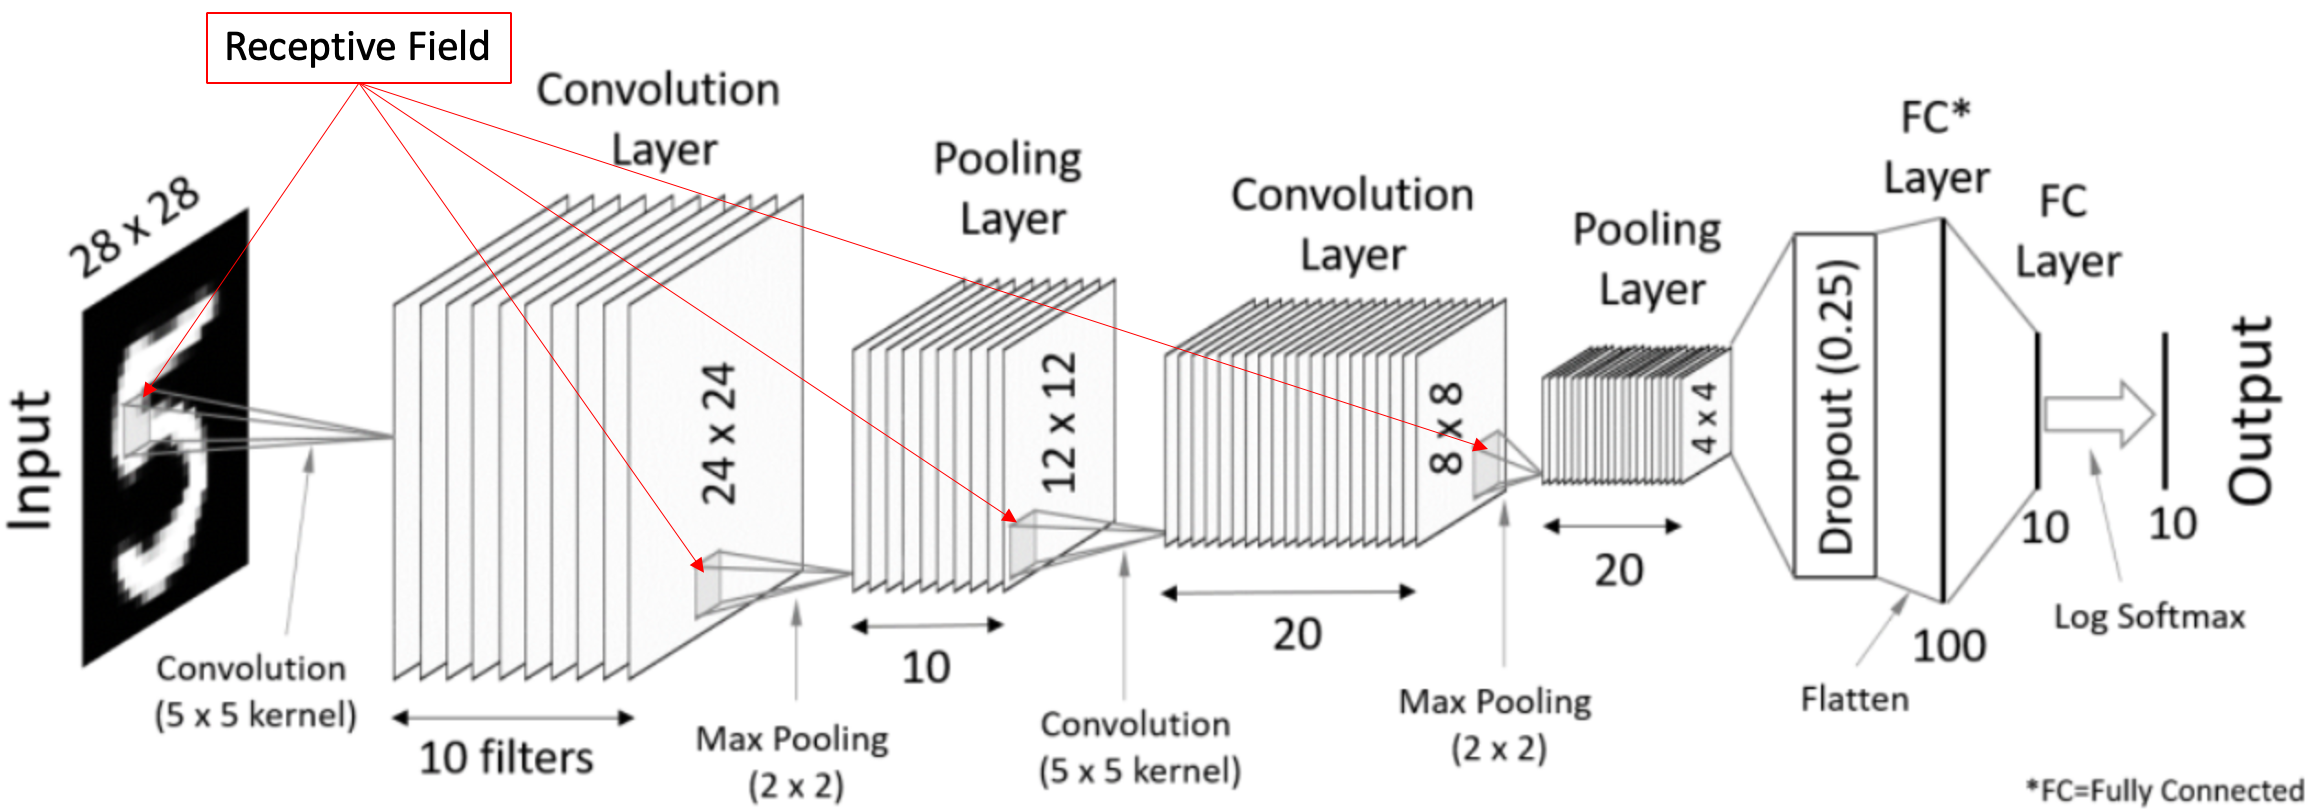

Image ref -> http://fourier.eng.hmc.edu/e176/lectures/ch10/node8.html


In [2]:
# CNN Architecture and Receptive Field: 
display(Image(image_path + 'CNN Architecture and Receptive Field.png', width=1100, unconfined=True))
print('Image ref -> http://fourier.eng.hmc.edu/e176/lectures/ch10/node8.html')

Notice how the receptive field is a small part of the image rather than its entirety.

## 2.1 - CNN Operations:

As previously described, CNNs takes advantage of new types of layers that accounts for __mult-dimensionality__ and __local connectivity__ of the input data. The following lists the concepts that will be covered in this section.

### List of CNN Operations:
1. Convolutional Layers
    - Concept
    - Properties
    - Hyperparameters
    - TF and Keras implementations
2. Pooling Layers
    - Concept and Hyperparamters
    - TF and Keras implementations
3. Fully Connected Layers
    - Usage in the CNN architecture
    - TF and Keras implementations
4. Effective Receptive Field:
    - Definition
    - Formula
    
## 2.2 - Convolutional Layers:

For more information:
- https://ronjian.github.io/blog/2018/03/23/CNN
- https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215
- https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/
- https://blog.xrds.acm.org/2016/06/convolutional-neural-networks-cnns-illustrated-explanation/
- https://www.kdnuggets.com/2015/11/understanding-convolutional-neural-networks-nlp.html

### 2.2.1 - Concept of Convolutions:

Convolutions are the core of the CNN architecture, where the number of parameters would be reduced by sharing the same weights and bias in these layers for all the neurons connected to the same output channel. Similarly it can be thought of as a single neuron (with shared weights and bias) that is sliding over the whole input matrix with spatially limited connectivity, where at each of these steps, the neuron is spatially conected to a local region that it is currently sliding over of the input volume (H x W x D).

#### To demonstrate this, the following diagram shows how a kernel is sliding over the input:

In [ ]:
# Illustration of the convolutions:
with open(image_path + 'conv_cs231n.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

As it can be seen, there is a two kernels (a.k.a filter) present where for the first output volume, the Filter of Weight 0 (W0)slides over the input volume, then followed by doing the same with the second kernel. For each step of sliding, it performs the same computation of $z = W * X + b$. In other words, the results of the convolution are obtained by sliding a filter (W) over the input matrix (X) and computing the dot product of the filter and the patch of X at the current position. It repeats this process for the first kernel and then proceeds to the next kernel. As a convolutional layer have N sets of neurons, the response maps are then stacked together into an output tensor with a dimensional shape of $H_{o} * W_{o} * N$.

Note: The input volumes can also be seen to have a padding of zeros, this can be seen as the border of zeros around the original input matrix. This is common practice to help ensure that the output remains the same size as the original input. 

### 2.2.2 - Properties:

A convolutional layer that has N sets of neurons can be defined by N weight matrices (kernels) that has the shape of $ D * k * k  $ for a square kernel and has N number of bias values. In terms of parameter numbers, this layer would equate to $ N * (D * k^{2} + 1) $ parameters to train, whereas for a FC-layer the number of parameters to train on wwould equate to $ (H * W * D) * (H_{o} * W_{o} * N) $. This means that the convolutional layers are not affected by the dimensionality of the data like FC-layers are. These intermediary output reulst of the conolutional layers are called __feature maps__ abd the number of feature maps is the same ass the number of kernels used. A stack of these features according to N feature maps are called a __feature volume__ denoted as $ (H_{o} * W_{o} * N) $.

This is the property that gives convolutional layers its power when it comes to computer vision tasks. There are two reasons for this, where the first is that training the network with larger input images wont impact the parameters count and the second is that the convolutional layers can be applied to any images of different sizes.

Further, the kernels in a layer were found to be good at identifying specific local features of an image. For exmaple, when the architecture of a CNN consist of more than one convolutional layer, it can be seen that the first convolutional layer would learn to activate on specific low-level features such as line orientation or colour gradients. when it comes to the deeper convolutional layers, it can be seen that it is able to extract and activate on more advanced features (or abstract features) such as the shape of a face, contours of an object. Overall this means that the convolutional layers are invariant to translation in the image coordinate space. 




### 2.2.3 - Hyperparameters:




### 2.2.4 - TF and Keras Implementations:

## 2.3 - Pooling Layers:

### 2.3.1 - Concept and Hyperparameters:



### 2.3.2 - TF and Keras Implementations:

## 2.4 - Fully Connected Layers:

### 2.4.1 - Usage in CNN Architecture:



### 2.4.2 - TF and Keras Implementations:

## 2.3 - Effective Receptive Fields:

### 2.3.1 - Definition:



### 2.3.2 - Formula




## Summary:

